In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import difflib
import networkx as nx

from utils import hemibrain_types
from influence_metrics import homogeneous_gains, heterogeneous_gains

For this simple example, we will be using a small subset of the hemibrain connectome (Scheffer et al. 2020). Specifically, we will be looking at neurons involved in the geosmin-avoidance behavior in flies (Huoviala et al. 2020).  

<a href="https://ibb.co/jfjvbq4"><img src="https://i.ibb.co/tK1MQnC/Screen-Shot-2023-09-11-at-9-56-15-PM.png" alt="Screen-Shot-2023-09-11-at-9-56-15-PM" border="0"></a>

In [2]:
# Small graph example 
df_G = pd.read_pickle('data/G_geosmin_trunc.pkl')

G = nx.DiGraph()
G= nx.from_pandas_edgelist(df_G, 'pre', 'post', ['weight'], create_using=nx.DiGraph())

J = nx.to_pandas_adjacency(G).T # Adjacency matrix (postsynaptic, presynaptic)

source = [1670934213] # dl4_pn 
sink = [981000564] # dnp42


### Fixed gains
Ranks each neuron in graph J based on how ablation of the neuron decreases the total pathway weight sums from source neuron(s) to sink neuron(s). Fixed gain for each neuron determines how quickly pathways of increasing length attenuate. 


In [3]:
fixed_gain_ranking = homogeneous_gains(device='cpu', 
                  J=J, 
                  source=source, 
                  sink=sink, 
                  gain=0.5, 
                  label='test')

starting experiment fixed_gains_test_gain_0.5
total influence: 0.00028988937
batch 0 out of 145
batch 1 out of 145
batch 2 out of 145
batch 3 out of 145
batch 4 out of 145
batch 5 out of 145
batch 6 out of 145
batch 7 out of 145
batch 8 out of 145
batch 9 out of 145
batch 10 out of 145
batch 11 out of 145
batch 12 out of 145
batch 13 out of 145
batch 14 out of 145
batch 15 out of 145
batch 16 out of 145
batch 17 out of 145
batch 18 out of 145
batch 19 out of 145
batch 20 out of 145
batch 21 out of 145
batch 22 out of 145
batch 23 out of 145
batch 24 out of 145
batch 25 out of 145
batch 26 out of 145
batch 27 out of 145
batch 28 out of 145
batch 29 out of 145
batch 30 out of 145
batch 31 out of 145
batch 32 out of 145
batch 33 out of 145
batch 34 out of 145
batch 35 out of 145
batch 36 out of 145
batch 37 out of 145
batch 38 out of 145
batch 39 out of 145
batch 40 out of 145
batch 41 out of 145
batch 42 out of 145
batch 43 out of 145
batch 44 out of 145
batch 45 out of 145
batch 46 out 

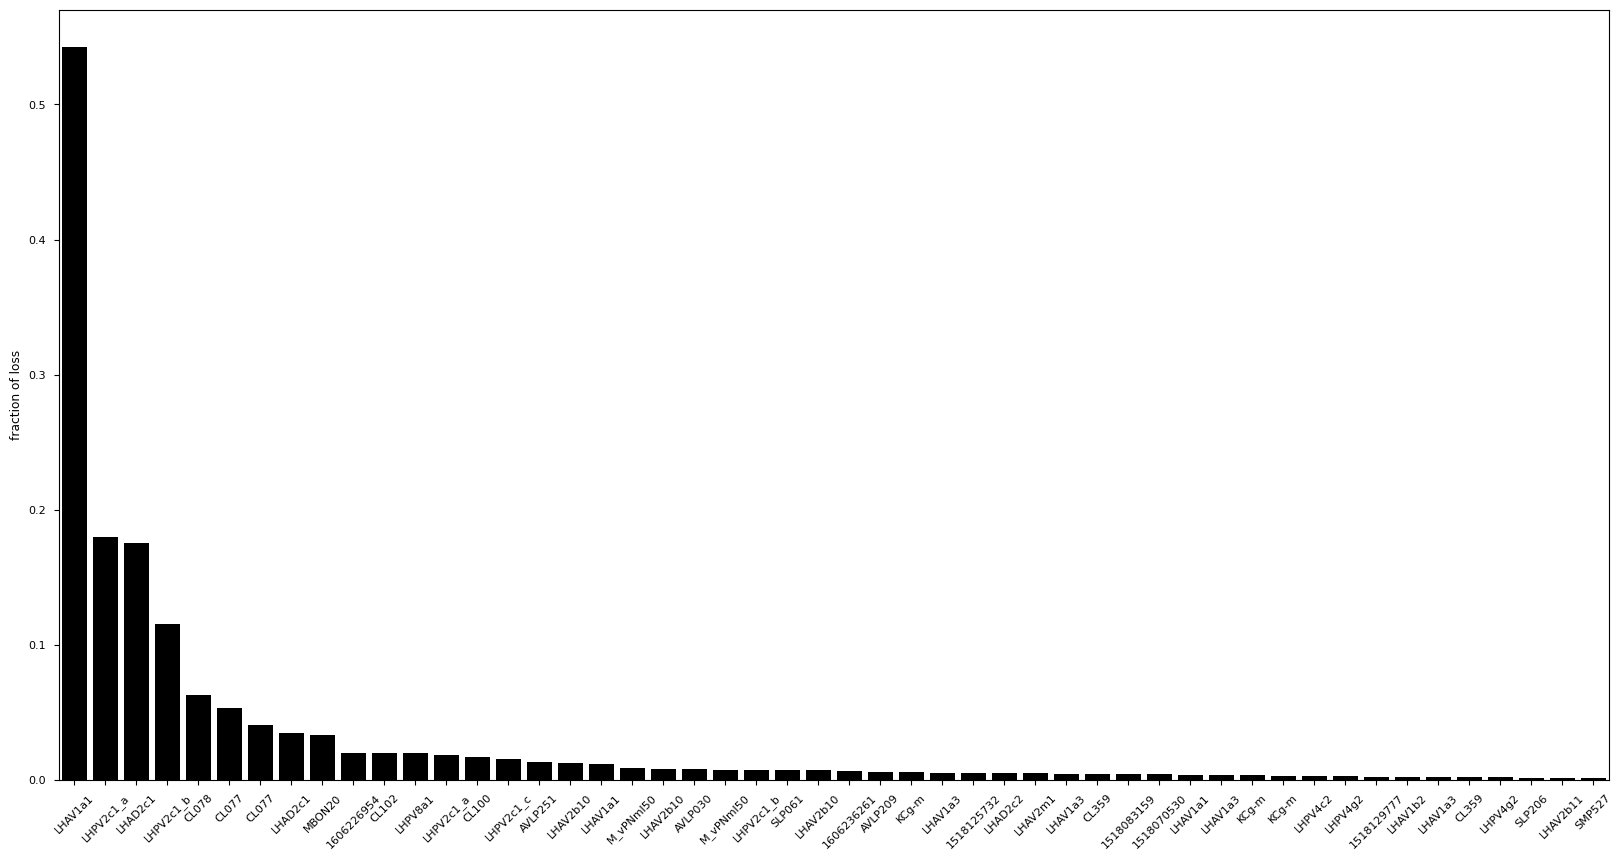

In [4]:
# Visualize fraction of loss for each neuron
fixed_gain_ranking['types'] = hemibrain_types(list(fixed_gain_ranking['nodes']))
snipped = fixed_gain_ranking[:50].reset_index()
plt.figure(figsize=(20,10))
ax = sns.barplot(data=snipped, x=snipped.index, y='fraction of loss', ci=None, color='black')
ax.set_xticklabels(snipped['types'])
plt.xticks(rotation=45)
plt.show()

### Learned gains
Learns a gain for each neuron in graph J such that activity at the sink neuron(s) given input at source neuron(s) is maximized. Gain bound parameter determines upper bound on the sum of all gains in the network.

In [5]:
learned_gains = heterogeneous_gains(device='cpu', 
                    J=J, 
                    source=source, 
                    sink=sink, 
                    gain_bound=5,
                    num_epochs=200, 
                    label='test', 
                    early_convergence=True, 
                    random_init=True, 
                    iter=0, 
                    profile=False)

learned_gains_test_gainbound_5_iter_0
running on cpu
starting training...
Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30
Epoch: 31
Epoch: 32
Epoch: 33
Epoch: 34
Epoch: 35
Epoch: 36
Epoch: 37
Epoch: 38
Epoch: 39
Epoch: 40
Epoch: 41
Epoch: 42
Epoch: 43
Epoch: 44
Epoch: 45
Epoch: 46
Epoch: 47
Epoch: 48
Epoch: 49
Epoch: 50
Epoch: 51
Epoch: 52
Epoch: 53
Epoch: 54
Epoch: 55
Epoch: 56
Epoch: 57
Epoch: 58
Epoch: 59
Epoch: 60
Epoch: 61
Epoch: 62
Epoch: 63
Epoch: 64
Epoch: 65
Epoch: 66
Epoch: 67
Epoch: 68
Epoch: 69
Epoch: 70
Epoch: 71
Epoch: 72
Epoch: 73
Epoch: 74
Epoch: 75
Epoch: 76
Epoch: 77
Epoch: 78
Epoch: 79
Epoch: 80
Epoch: 81
Epoch: 82
Epoch: 83
Epoch: 84
Epoch: 85
Epoch: 86
Epoch: 87
Epoch: 88
Epoch: 89
Epoch: 90
Epoch: 91
Epoch: 92
Epoch:

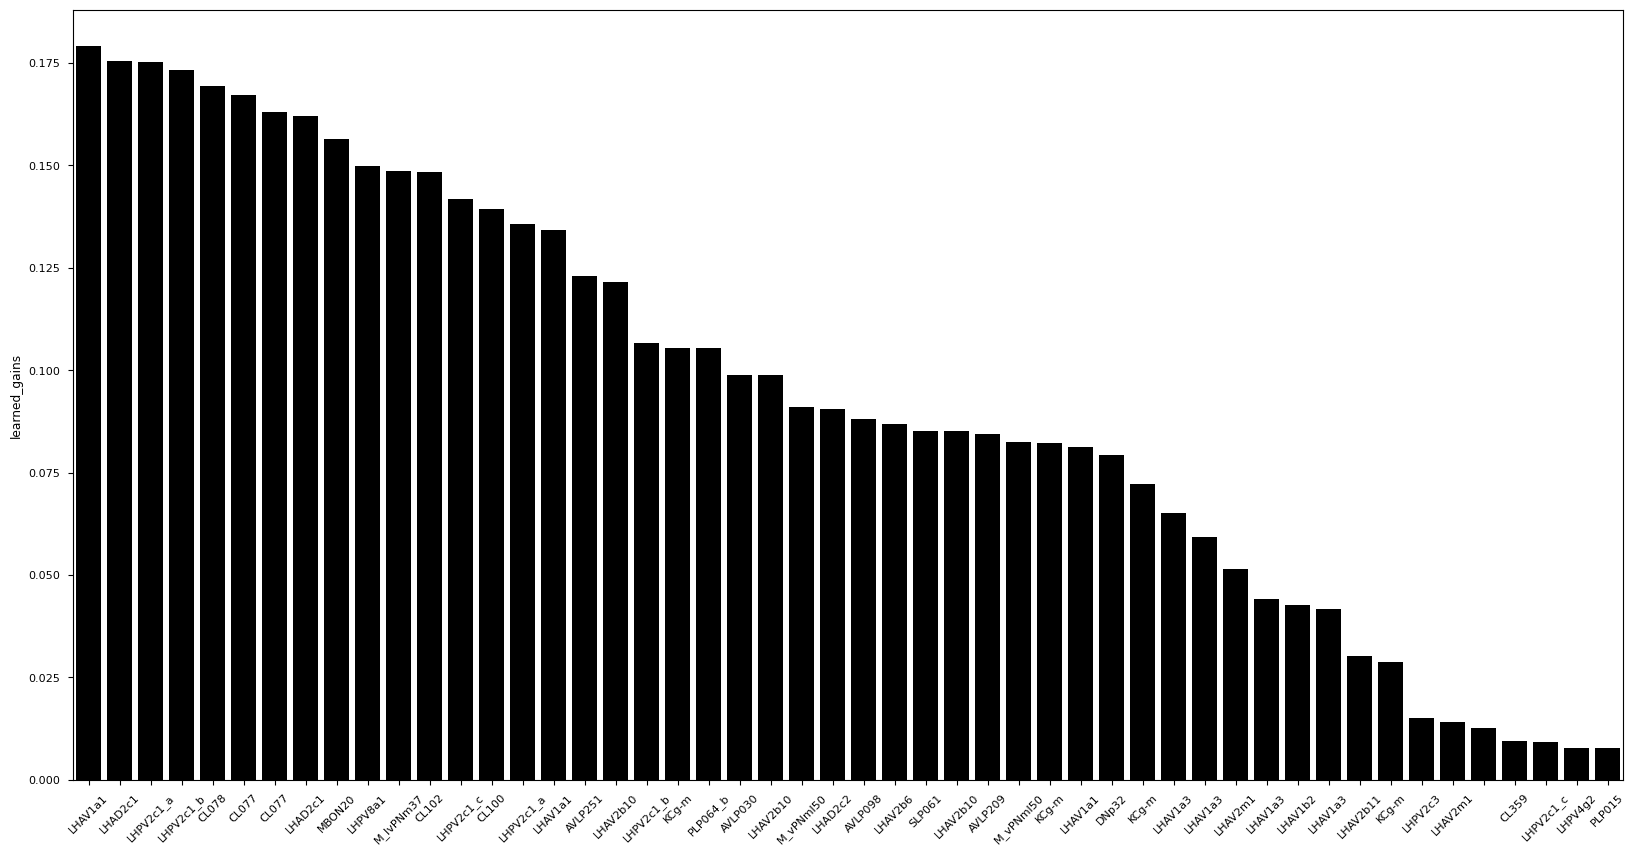

In [6]:
# # Visualize learned gains
learned_gains = learned_gains.sort_values(by='learned_gains', ascending=False)
types  = hemibrain_types(learned_gains['nodes'])
learned_gains['types'] = types
#remove source and sink from ranking
learned_gains = learned_gains[learned_gains['nodes'] != source[0]]
learned_gains = learned_gains[learned_gains['nodes'] != sink[0]]

snipped = learned_gains[:50].reset_index()
plt.figure(figsize=(20,10))
ax = sns.barplot(data=snipped, x=snipped.index, y='learned_gains', ci=None, color='black')
ax.set_xticklabels(snipped['types'])
plt.xticks(rotation=45)
plt.show()